### Import modules

In [3]:
# Get Soup
import requests
from bs4 import BeautifulSoup
import re
import dateutil.parser
from urllib.request import urlopen
import pandas as pd
import numpy as np

## 1.0 Querying the database

In [13]:
import dateutil
query_date = dateutil.parser.parse('june 16, ')

In [14]:
ps_df[ps_df['date_published'] >= query_date]

,titles,author,date_published,articles,source
0,The Gulf States’ Expat Dividend,Sami Mahroum,2016-06-17,PARIS – How should policymakers in the Middle ...,https://www.project-syndicate.org/commentary/g...
1,Health-Care Innovation in the Global South,Shams El Arifeen,2016-06-17,DHAKA – Children die from preventable and trea...,https://www.project-syndicate.org/commentary/d...
2,A Good Economy for China,Edmund S. Phelps,2016-06-17,NEW YORK – Decades of plodding growth together...,https://www.project-syndicate.org/commentary/c...
3,Brexit’s Impact on the World Economy,Anatole Kaletsky,2016-06-17,LONDON – The febrile behavior of financial mar...,https://www.project-syndicate.org/commentary/b...
4,Europe’s Refugee Culture Clash,Paulina Neuding,2016-06-16,STOCKHOLM – The international Christian organi...,https://www.project-syndicate.org/commentary/e...
5,Gays on the Front Line,Bernard-Henri Lévy,2016-06-16,"PARIS – The mass shooting in Orlando, Florida,...",https://www.project-syndicate.org/commentary/o...
6,The World’s Ins and Outs,Lucy P. Marcus,2016-06-16,LONDON – As the United Kingdom’s debate about ...,https://www.project-syndicate.org/commentary/b...
7,Toward a More Reflective Planet,David Keith,2016-06-16,CAMBRIDGE – The last time the atmosphere held ...,https://www.project-syndicate.org/commentary/a...
8,The Agony of the Republicans,Elizabeth Drew,2016-06-16,"WASHINGTON, DC – This is a grim time for Ameri...",https://www.project-syndicate.org/commentary/t...
9,What’s the Matter With Austria?,Dalia Marin,2016-06-15,"MUNICH – Last month, Austria avoided the elect...",https://www.project-syndicate.org/commentary/a...


In [7]:
ps_df = pd.read_pickle('ps_df_2.pkl')
query = 'mega infrastructure projects future'

In [86]:
##Finding rows with key words and then sort by most similar
query_rows = []
for row in range(ps_df.shape[0]):
    score=0
    for word in query.split():
        if (word in ps_df.loc[row,'articles']) or (word in ps_df.loc[row,'titles']):
            score += 1
    query_rows.append(score)

In [87]:
ps_df['query_score'] = pd.Series(query_rows)

query_df = ps_df.sort_values(by='query_score',ascending=False)
query_df = query_df[query_df['query_score']>0].reset_index(drop=True)
if query_df.shape[0]:
    query_df = query_df.loc[0:999,:]

In [88]:
query_df

,titles,author,date_published,articles,source,query_score
0,The Solar Price Revolution,Klaus Töpfer,"Apr 3, 2015",POTSDAM – A silent revolution is under way. In...,https://www.project-syndicate.org/commentary/s...,4
1,India’s Deadly Cities,Asit K. Biswas,"Aug 18, 2015",SINGAPORE – China and India are driving Asia’s...,https://www.project-syndicate.org/commentary/i...,4
2,Renewable Energy and Middle East Economic Renewal,Moha Ennaji,"Feb 19, 2016",FEZ – The global oil-price bust has devastated...,https://www.project-syndicate.org/commentary/m...,4
3,Renewed Hope for Renewable Energy,Kandeh K. Yumkella,"Oct 6, 2009","VIENNA – A decade ago, renewable energy was vi...",https://www.project-syndicate.org/commentary/r...,3
4,Sustainable Energy Now,Anita George,"Apr 15, 2015","WASHINGTON, DC – The world has never been clos...",https://www.project-syndicate.org/commentary/s...,3
5,Troubled Water,Rashad Kaldany,"Jun 12, 2012","WASHINGTON, DC– By the time you finish reading...",https://www.project-syndicate.org/commentary/t...,3
6,Global Energy Realism,Ana Palacio,"Dec 10, 2014",MADRID – Energy has become a focal point of gl...,https://www.project-syndicate.org/commentary/g...,3
7,A Free Lunch for America,J. Bradford DeLong,"Sep 29, 2011",BERKELEY – Former US Treasury Secretary Lawren...,https://www.project-syndicate.org/commentary/a...,3
8,Containing the Resource Crisis,Alejandro Litovsky,"Jul 14, 2014","LONDON – The proclamation of a new Cold War, f...",https://www.project-syndicate.org/commentary/a...,3
9,A Better EU Budget,Guy Verhofstadt,"Jun 24, 2013",BRUSSELS – Stopping Europe’s economic decline ...,https://www.project-syndicate.org/commentary/f...,3


# 2.0 Network generation

### 2.1 Calculate similarity between articles

In [89]:
## Network generation
## First calculate similarity between articles
tfidfvectorizer = TfidfVectorizer(tokenizer=tokenizeText,strip_accents='unicode',ngram_range=(1,4))

query_tfidf = tfidfvectorizer.fit_transform(query_df.loc[:,'articles'])
weights = (query_tfidf * query_tfidf.T).A.tolist()

In [ ]:
norms = np.sqrt(np.sum(query_tfidf * query_tfidf, axis=1, keepdims=True))  # multiplication between arrays is element-wise

query_tfidf_normed = query_tfidf / norms

weights = np.dot(query_tfidf_normed, query_tfidf_normed.T)

### 2.2 Generate graph

In [90]:
graph = nx.Graph()
graph.add_edges_from(
    (i, j, {'weight': weights[i][j]})
    for i in range(query_tfidf.shape[0]) for j in range(i + 1, query_tfidf.shape[0]))

### 2.3 Cluster graphs into groupings based on maximum modularity

In [91]:
partition = best_partition(graph,resolution=0.8)

In [92]:
query_df['group'] = pd.Series(list(partition.values()))

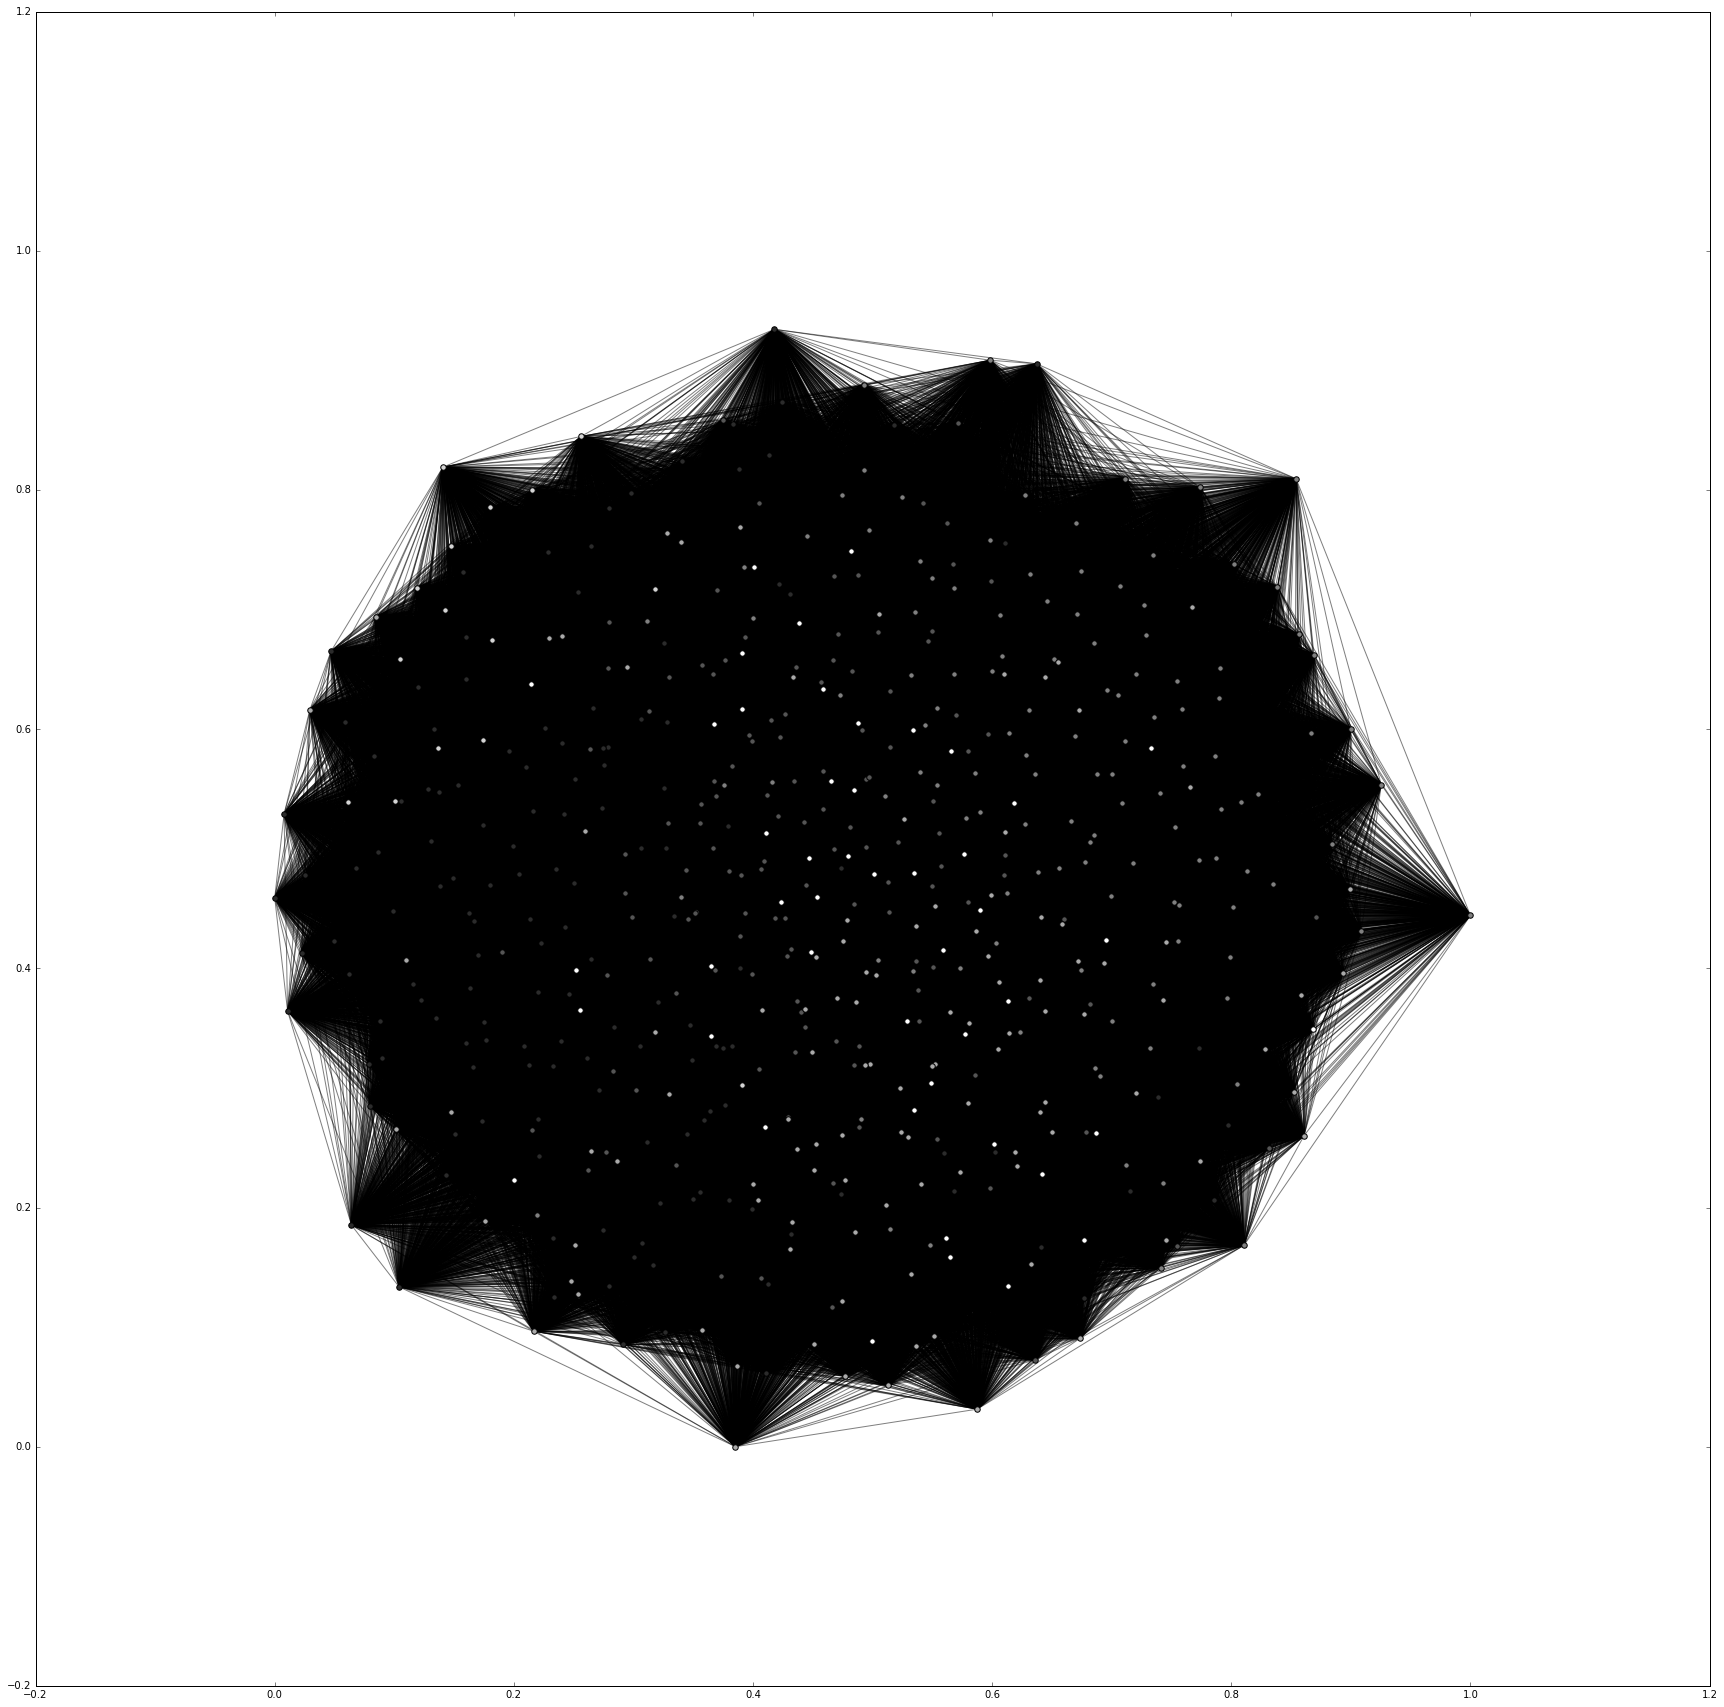

In [220]:
### Draw network

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
count = 0
for com in set(partition.values()) :
    count += 1
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 30,
                                node_color = str(count / size))
nx.draw_networkx_edges(graph,pos, alpha=0.5)


In [99]:
query_df

,titles,author,date_published,articles,source,query_score,group,sent_score,subj_score,length
0,The Solar Price Revolution,Klaus Töpfer,"Apr 3, 2015",POTSDAM – A silent revolution is under way. In...,https://www.project-syndicate.org/commentary/s...,4,0,0.606695,0.441589,767
1,India’s Deadly Cities,Asit K. Biswas,"Aug 18, 2015",SINGAPORE – China and India are driving Asia’s...,https://www.project-syndicate.org/commentary/i...,4,1,0.524630,0.391922,845
2,Renewable Energy and Middle East Economic Renewal,Moha Ennaji,"Feb 19, 2016",FEZ – The global oil-price bust has devastated...,https://www.project-syndicate.org/commentary/m...,4,0,0.708468,0.422566,730
3,Renewed Hope for Renewable Energy,Kandeh K. Yumkella,"Oct 6, 2009","VIENNA – A decade ago, renewable energy was vi...",https://www.project-syndicate.org/commentary/r...,3,0,0.465909,0.379101,777
4,Sustainable Energy Now,Anita George,"Apr 15, 2015","WASHINGTON, DC – The world has never been clos...",https://www.project-syndicate.org/commentary/s...,3,0,0.648693,0.456173,841
5,Troubled Water,Rashad Kaldany,"Jun 12, 2012","WASHINGTON, DC– By the time you finish reading...",https://www.project-syndicate.org/commentary/t...,3,2,0.593593,0.439961,717
6,Global Energy Realism,Ana Palacio,"Dec 10, 2014",MADRID – Energy has become a focal point of gl...,https://www.project-syndicate.org/commentary/g...,3,0,0.587622,0.349625,877
7,A Free Lunch for America,J. Bradford DeLong,"Sep 29, 2011",BERKELEY – Former US Treasury Secretary Lawren...,https://www.project-syndicate.org/commentary/a...,3,3,0.231608,0.321149,289
8,Containing the Resource Crisis,Alejandro Litovsky,"Jul 14, 2014","LONDON – The proclamation of a new Cold War, f...",https://www.project-syndicate.org/commentary/a...,3,2,0.515520,0.423882,801
9,A Better EU Budget,Guy Verhofstadt,"Jun 24, 2013",BRUSSELS – Stopping Europe’s economic decline ...,https://www.project-syndicate.org/commentary/f...,3,4,0.569134,0.201471,218


In [97]:
query_df.to_csv('query_df.csv')

## Appendix: Supporting modules

In [3]:
## NLP modules
import gensim
from gensim.models.doc2vec import Doc2Vec
import nltk
import textblob
from textblob import TextBlob
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords ##Note you'll need to download NLTK and corpuses
from spacy.en import English ##Note you'll need to install Spacy and download its dependencies
parser = English()

## Other Python modules
import itertools
from operator import itemgetter
import re
import string
import numpy as np
import pandas as pd
import matplotlib
from IPython.display import IFrame

# Graph module
import networkx as nx

## Machine learning & text vectorizer modules
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# A custom function to clean the text before sending it into the vectorizer
def cleanText(text):
    # get rid of newlines
    text = text.strip().replace("\n", " ").replace("\r", " ")
    
    # replace twitter @mentions
    mentionFinder = re.compile(r"@[a-z0-9_]{1,15}", re.IGNORECASE)
    text = mentionFinder.sub("@MENTION", text)
    text = re.sub('[^a-zA-Z ]','',text)
    # replace HTML symbols
    text = text.replace("&amp;", "and").replace("&gt;", ">").replace("&lt;", "<")
    
    # lowercase
    text = text.lower()
#     text = str(TextBlob(text).correct())
    return text

# A custom function to tokenize the text using spaCy
# and convert to lemmas
def tokenizeText(sample):
    # get the tokens using spaCy
    tokens = parser(cleanText(sample))

    # lemmatize
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas

    # stoplist the tokens
    tokens = [tok for tok in tokens if tok not in STOPLIST]

    # stoplist symbols
    tokens = [tok for tok in tokens if tok not in SYMBOLS]

    # remove large strings of whitespace
    while "" in tokens:
        tokens.remove("")
    while " " in tokens:
        tokens.remove(" ")
    while "\n" in tokens:
        tokens.remove("\n")
    while "\n\n" in tokens:
        tokens.remove("\n\n")

    return tokens

# A custom stoplist
STOPLIST = set(stopwords.words('english') + ["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS))
# List of symbols we don't care about
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-----", "---", "...", "“", "”", "'ve"]

## Tokenizer specific for Doc2Vec where each word is important, so stop words are not removed.
def doc2vec_tokenizeText(corpus):
    punctuation = """.,?!:;(){}[]"""
    corpus = [z.lower().replace('\n','') for z in corpus]
    corpus = [z.replace('<br />', ' ') for z in corpus]

    #treat punctuation as individual words
    for c in punctuation:
        corpus = [z.replace(c, ' %s '%c) for z in corpus]
    corpus = [z.split() for z in corpus]
    return corpus

In [5]:
def cos_sim(text1,text2):
    tfvectorizer = TfidfVectorizer(tokenizer=tokenizeText)
    arrays = tfvectorizer.fit_transform([text1,text2]).A
    num = (arrays[0]*arrays[1]).sum()
    denom1 = np.sqrt((arrays[0]**2).sum())
    denom2 = np.sqrt((arrays[1]**2).sum())
    return num/(denom1*denom2)

In [6]:
# coding=utf-8

class Status(object):
    """
    To handle several data in one struct.

    Could be replaced by named tuple, but don't want to depend on python 2.6
    """
    node2com = {}
    total_weight = 0
    internals = {}
    degrees = {}
    gdegrees = {}

    def __init__(self):
        self.node2com = dict([])
        self.total_weight = 0
        self.degrees = dict([])
        self.gdegrees = dict([])
        self.internals = dict([])
        self.loops = dict([])

    def __str__(self):
        return ("node2com : " + str(self.node2com) + " degrees : "
                + str(self.degrees) + " internals : " + str(self.internals)
                + " total_weight : " + str(self.total_weight))

    def copy(self):
        """Perform a deep copy of status"""
        new_status = Status()
        new_status.node2com = self.node2com.copy()
        new_status.internals = self.internals.copy()
        new_status.degrees = self.degrees.copy()
        new_status.gdegrees = self.gdegrees.copy()
        new_status.total_weight = self.total_weight

    def init(self, graph, weight, part=None):
        """Initialize the status of a graph with every node in one community"""
        count = 0
        self.node2com = dict([])
        self.total_weight = 0
        self.degrees = dict([])
        self.gdegrees = dict([])
        self.internals = dict([])
        self.total_weight = graph.size(weight=weight)
        if part is None:
            for node in graph.nodes():
                self.node2com[node] = count
                deg = float(graph.degree(node, weight=weight))
                if deg < 0:
                    error = "Bad graph type ({})".format(type(graph))
                    raise ValueError(error)
                self.degrees[count] = deg
                self.gdegrees[node] = deg
                edge_data = graph.get_edge_data(node, node, {weight: 0})
                self.loops[node] = float(edge_data.get(weight, 1))
                self.internals[count] = self.loops[node]
                count += 1
        else:
            for node in graph.nodes():
                com = part[node]
                self.node2com[node] = com
                deg = float(graph.degree(node, weight=weight))
                self.degrees[com] = self.degrees.get(com, 0) + deg
                self.gdegrees[node] = deg
                inc = 0.
                for neighbor, datas in graph[node].items():
                    edge_weight = datas.get(weight, 1)
                    if edge_weight <= 0:
                        error = "Bad graph type ({})".format(type(graph))
                        raise ValueError(error)
                    if part[neighbor] == com:
                        if neighbor == node:
                            inc += float(edge_weight)
                        else:
                            inc += float(edge_weight) / 2.
                self.internals[com] = self.internals.get(com, 0) + inc


In [7]:
# -*- coding: utf-8 -*-
"""
This module implements community detection.
"""
from __future__ import print_function
import networkx as nx
import array

__author__ = """Thomas Aynaud (thomas.aynaud@lip6.fr)"""
#    Copyright (C) 2009 by
#    Thomas Aynaud <thomas.aynaud@lip6.fr>
#    All rights reserved.
#    BSD license.

__PASS_MAX = -1
__MIN = 0.0000001


def partition_at_level(dendrogram, level):
    """Return the partition of the nodes at the given level

    A dendrogram is a tree and each level is a partition of the graph nodes.
    Level 0 is the first partition, which contains the smallest communities,
    and the best is len(dendrogram) - 1.
    The higher the level is, the bigger are the communities

    Parameters
    ----------
    dendrogram : list of dict
       a list of partitions, ie dictionnaries where keys of the i+1 are the
       values of the i.
    level : int
       the level which belongs to [0..len(dendrogram)-1]

    Returns
    -------
    partition : dictionnary
       A dictionary where keys are the nodes and the values are the set it
       belongs to

    Raises
    ------
    KeyError
       If the dendrogram is not well formed or the level is too high

    See Also
    --------
    best_partition which directly combines partition_at_level and
    generate_dendrogram to obtain the partition of highest modularity

    Examples
    --------
    >>> G=nx.erdos_renyi_graph(100, 0.01)
    >>> dendrogram = generate_dendrogram(G)
    >>> for level in range(len(dendrogram) - 1) :
    >>>     print("partition at level", level, "is", partition_at_level(dendrogram, level))  # NOQA
    """
    partition = dendrogram[0].copy()
    for index in range(1, level + 1):
        for node, community in partition.items():
            partition[node] = dendrogram[index][community]
    return partition


def modularity(partition, graph, weight='weight'):
    """Compute the modularity of a partition of a graph

    Parameters
    ----------
    partition : dict
       the partition of the nodes, i.e a dictionary where keys are their nodes
       and values the communities
    graph : networkx.Graph
       the networkx graph which is decomposed
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'


    Returns
    -------
    modularity : float
       The modularity

    Raises
    ------
    KeyError
       If the partition is not a partition of all graph nodes
    ValueError
        If the graph has no link
    TypeError
        If graph is not a networkx.Graph

    References
    ----------
    .. 1. Newman, M.E.J. & Girvan, M. Finding and evaluating community
    structure in networks. Physical Review E 69, 26113(2004).

    Examples
    --------
    >>> G=nx.erdos_renyi_graph(100, 0.01)
    >>> part = best_partition(G)
    >>> modularity(part, G)
    """
    if type(graph) != nx.Graph:
        raise TypeError("Bad graph type, use only non directed graph")

    inc = dict([])
    deg = dict([])
    links = graph.size(weight=weight)
    if links == 0:
        raise ValueError("A graph without link has an undefined modularity")

    for node in graph:
        com = partition[node]
        deg[com] = deg.get(com, 0.) + graph.degree(node, weight=weight)
        for neighbor, datas in graph[node].items():
            edge_weight = datas.get(weight, 1)
            if partition[neighbor] == com:
                if neighbor == node:
                    inc[com] = inc.get(com, 0.) + float(edge_weight)
                else:
                    inc[com] = inc.get(com, 0.) + float(edge_weight) / 2.

    res = 0.
    for com in set(partition.values()):
        res += (inc.get(com, 0.) / links) - \
               (deg.get(com, 0.) / (2. * links)) ** 2
    return res


def best_partition(graph, partition=None, weight='weight', resolution=1.):
    """Compute the partition of the graph nodes which maximises the modularity
    (or try..) using the Louvain heuristices

    This is the partition of highest modularity, i.e. the highest partition
    of the dendrogram generated by the Louvain algorithm.

    Parameters
    ----------
    graph : networkx.Graph
       the networkx graph which is decomposed
    partition : dict, optional
       the algorithm will start using this partition of the nodes.
       It's a dictionary where keys are their nodes and values the communities
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'
    resolution :  double, optional
        Will change the size of the communities, default to 1.
        represents the time described in
        "Laplacian Dynamics and Multiscale Modular Structure in Networks",
        R. Lambiotte, J.-C. Delvenne, M. Barahona

    Returns
    -------
    partition : dictionnary
       The partition, with communities numbered from 0 to number of communities

    Raises
    ------
    NetworkXError
       If the graph is not Eulerian.

    See Also
    --------
    generate_dendrogram to obtain all the decompositions levels

    Notes
    -----
    Uses Louvain algorithm

    References
    ----------
    .. 1. Blondel, V.D. et al. Fast unfolding of communities in
    large networks. J. Stat. Mech 10008, 1-12(2008).

    Examples
    --------
    >>>  #Basic usage
    >>> G=nx.erdos_renyi_graph(100, 0.01)
    >>> part = best_partition(G)

    >>> #other example to display a graph with its community :
    >>> #better with karate_graph() as defined in networkx examples
    >>> #erdos renyi don't have true community structure
    >>> G = nx.erdos_renyi_graph(30, 0.05)
    >>> #first compute the best partition
    >>> partition = community.best_partition(G)
    >>>  #drawing
    >>> size = float(len(set(partition.values())))
    >>> pos = nx.spring_layout(G)
    >>> count = 0.
    >>> for com in set(partition.values()) :
    >>>     count += 1.
    >>>     list_nodes = [nodes for nodes in partition.keys()
    >>>                                 if partition[nodes] == com]
    >>>     nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                    node_color = str(count / size))
    >>> nx.draw_networkx_edges(G,pos, alpha=0.5)
    >>> plt.show()
    """
    dendo = generate_dendrogram(graph, partition, weight, resolution)
    return partition_at_level(dendo, len(dendo) - 1)


def generate_dendrogram(graph, part_init=None, weight='weight', resolution=1.):
    """Find communities in the graph and return the associated dendrogram

    A dendrogram is a tree and each level is a partition of the graph nodes.
    Level 0 is the first partition, which contains the smallest communities,
    and the best is len(dendrogram) - 1. The higher the level is, the bigger
    are the communities


    Parameters
    ----------
    graph : networkx.Graph
        the networkx graph which will be decomposed
    part_init : dict, optional
        the algorithm will start using this partition of the nodes. It's a
        dictionary where keys are their nodes and values the communities
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'
    resolution :  double, optional
        Will change the size of the communities, default to 1.
        represents the time described in
        "Laplacian Dynamics and Multiscale Modular Structure in Networks",
        R. Lambiotte, J.-C. Delvenne, M. Barahona

    Returns
    -------
    dendrogram : list of dictionaries
        a list of partitions, ie dictionnaries where keys of the i+1 are the
        values of the i. and where keys of the first are the nodes of graph

    Raises
    ------
    TypeError
        If the graph is not a networkx.Graph

    See Also
    --------
    best_partition

    Notes
    -----
    Uses Louvain algorithm

    References
    ----------
    .. 1. Blondel, V.D. et al. Fast unfolding of communities in large
    networks. J. Stat. Mech 10008, 1-12(2008).

    Examples
    --------
    >>> G=nx.erdos_renyi_graph(100, 0.01)
    >>> dendo = generate_dendrogram(G)
    >>> for level in range(len(dendo) - 1) :
    >>>     print("partition at level", level,
    >>>           "is", partition_at_level(dendo, level))
    :param weight:
    :type weight:
    """
    if type(graph) != nx.Graph:
        raise TypeError("Bad graph type, use only non directed graph")

    # special case, when there is no link
    # the best partition is everyone in its community
    if graph.number_of_edges() == 0:
        part = dict([])
        for node in graph.nodes():
            part[node] = node
        return [part]

    current_graph = graph.copy()
    status = Status()
    status.init(current_graph, weight, part_init)
    status_list = list()
    __one_level(current_graph, status, weight, resolution)
    new_mod = __modularity(status)
    partition = __renumber(status.node2com)
    status_list.append(partition)
    mod = new_mod
    current_graph = induced_graph(partition, current_graph, weight)
    status.init(current_graph, weight)

    while True:
        __one_level(current_graph, status, weight, resolution)
        new_mod = __modularity(status)
        if new_mod - mod < __MIN:
            break
        partition = __renumber(status.node2com)
        status_list.append(partition)
        mod = new_mod
        current_graph = induced_graph(partition, current_graph, weight)
        status.init(current_graph, weight)
    return status_list[:]


def induced_graph(partition, graph, weight="weight"):
    """Produce the graph where nodes are the communities

    there is a link of weight w between communities if the sum of the weights
    of the links between their elements is w

    Parameters
    ----------
    partition : dict
       a dictionary where keys are graph nodes and  values the part the node
       belongs to
    graph : networkx.Graph
        the initial graph
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'


    Returns
    -------
    g : networkx.Graph
       a networkx graph where nodes are the parts

    Examples
    --------
    >>> n = 5
    >>> g = nx.complete_graph(2*n)
    >>> part = dict([])
    >>> for node in g.nodes() :
    >>>     part[node] = node % 2
    >>> ind = induced_graph(part, g)
    >>> goal = nx.Graph()
    >>> goal.add_weighted_edges_from([(0,1,n*n),(0,0,n*(n-1)/2), (1, 1, n*(n-1)/2)])  # NOQA
    >>> nx.is_isomorphic(int, goal)
    True
    """
    ret = nx.Graph()
    ret.add_nodes_from(partition.values())

    for node1, node2, datas in graph.edges_iter(data=True):
        edge_weight = datas.get(weight, 1)
        com1 = partition[node1]
        com2 = partition[node2]
        w_prec = ret.get_edge_data(com1, com2, {weight: 0}).get(weight, 1)
        ret.add_edge(com1, com2, attr_dict={weight: w_prec + edge_weight})

    return ret


def __renumber(dictionary):
    """Renumber the values of the dictionary from 0 to n
    """
    count = 0
    ret = dictionary.copy()
    new_values = dict([])

    for key in dictionary.keys():
        value = dictionary[key]
        new_value = new_values.get(value, -1)
        if new_value == -1:
            new_values[value] = count
            new_value = count
            count += 1
        ret[key] = new_value

    return ret


def __load_binary(data):
    """Load binary graph as used by the cpp implementation of this algorithm
    """
    data = open(data, "rb")

    reader = array.array("I")
    reader.fromfile(data, 1)
    num_nodes = reader.pop()
    reader = array.array("I")
    reader.fromfile(data, num_nodes)
    cum_deg = reader.tolist()
    num_links = reader.pop()
    reader = array.array("I")
    reader.fromfile(data, num_links)
    links = reader.tolist()
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))
    prec_deg = 0

    for index in range(num_nodes):
        last_deg = cum_deg[index]
        neighbors = links[prec_deg:last_deg]
        graph.add_edges_from([(index, int(neigh)) for neigh in neighbors])
        prec_deg = last_deg

    return graph


def __one_level(graph, status, weight_key, resolution):
    """Compute one level of communities
    """
    modified = True
    nb_pass_done = 0
    cur_mod = __modularity(status)
    new_mod = cur_mod

    while modified and nb_pass_done != __PASS_MAX:
        cur_mod = new_mod
        modified = False
        nb_pass_done += 1

        for node in graph.nodes():
            com_node = status.node2com[node]
            degc_totw = status.gdegrees.get(node, 0.) / (status.total_weight * 2.)  # NOQA
            neigh_communities = __neighcom(node, graph, status, weight_key)
            __remove(node, com_node,
                     neigh_communities.get(com_node, 0.), status)
            best_com = com_node
            best_increase = 0
            for com, dnc in neigh_communities.items():
                incr = resolution * dnc - \
                       status.degrees.get(com, 0.) * degc_totw
                if incr > best_increase:
                    best_increase = incr
                    best_com = com
            __insert(node, best_com,
                     neigh_communities.get(best_com, 0.), status)
            if best_com != com_node:
                modified = True
        new_mod = __modularity(status)
        if new_mod - cur_mod < __MIN:
            break


def __neighcom(node, graph, status, weight_key):
    """
    Compute the communities in the neighborhood of node in the graph given
    with the decomposition node2com
    """
    weights = {}
    for neighbor, datas in graph[node].items():
        if neighbor != node:
            edge_weight = datas.get(weight_key, 1)
            neighborcom = status.node2com[neighbor]
            weights[neighborcom] = weights.get(neighborcom, 0) + edge_weight

    return weights


def __remove(node, com, weight, status):
    """ Remove node from community com and modify status"""
    status.degrees[com] = (status.degrees.get(com, 0.)
                           - status.gdegrees.get(node, 0.))
    status.internals[com] = float(status.internals.get(com, 0.) -
                                  weight - status.loops.get(node, 0.))
    status.node2com[node] = -1


def __insert(node, com, weight, status):
    """ Insert node into community and modify status"""
    status.node2com[node] = com
    status.degrees[com] = (status.degrees.get(com, 0.) +
                           status.gdegrees.get(node, 0.))
    status.internals[com] = float(status.internals.get(com, 0.) +
                                  weight + status.loops.get(node, 0.))


def __modularity(status):
    """
    Fast compute the modularity of the partition of the graph using
    status precomputed
    """
    links = float(status.total_weight)
    result = 0.
    for community in set(status.node2com.values()):
        in_degree = status.internals.get(community, 0.)
        degree = status.degrees.get(community, 0.)
        if links > 0:
            result += in_degree / links - ((degree / (2. * links)) ** 2)
    return result
